# Weight Prediction using Machine Learning

In [112]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#Importng Dataset
df = pd.read_csv('weight-height.csv')

In [114]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [115]:
#Shape of the Dataset
df.shape

(10000, 3)

In [116]:
#Null Valu Checking
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Applying Linear Regression Algorithm before Removing Outlier

In [117]:
#One Hot Encoding
dummies = pd.get_dummies(df['Gender'], drop_first = True)

In [118]:
ndf = df.drop(['Gender'], axis = 'columns')

In [119]:
nwdf = pd.concat([ndf, dummies], axis = 1)

In [120]:
nwdf

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [121]:
#Dividing Datas into Features and Labe
x1 = nwdf.drop(['Weight'], axis = 1)

In [122]:
x1

,Height,Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
9995,66.172652,0
9996,67.067155,0
9997,63.867992,0
9998,69.034243,0


In [123]:
y1 = nwdf['Weight']

In [124]:
y1

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = .30, random_state = 1)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr1 = LinearRegression()

In [129]:
lr1.fit(x_train, y_train)

LinearRegression()

In [130]:
lr1.score(xtest, ytest)

0.8985362139219506

<AxesSubplot:xlabel='Weight', ylabel='Count'>

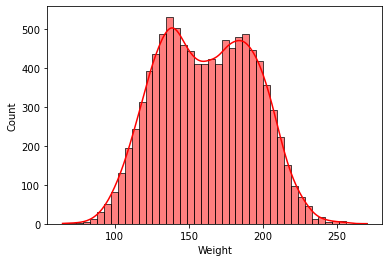

In [131]:
#Output Column is Normal Distribution or Not
sns.histplot(data = df, x = 'Weight', color = 'red', kde = True)

# Outlier Detection

In [132]:
mean_value = df['Weight'].mean()
mean_value

161.44035683283076

In [133]:
std_dev = df['Weight'].std()
std_dev

32.108439006519546

In [134]:
std3 = mean_value + (2.5 * std_dev)
std3

241.7114543491296

In [135]:
std3_neg = mean_value - (2.5 * std_dev)
std3_neg

81.16925931653189

In [136]:
df[df['Weight'] > std3]

,Gender,Height,Weight
0,Male,73.847017,241.893563
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741


In [137]:
df[df['Weight'] < std3_neg]

,Gender,Height,Weight
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7935,Female,58.211650,77.523774
8241,Female,56.167299,77.898559
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [138]:
outlier_data = df[(df['Weight'] > std3) | (df['Weight'] < std3_neg)]

In [139]:
outlier_data.shape

(27, 3)

In [140]:
removed_outlier_data = df[(df['Weight'] < std3) & (df['Weight'] > std3_neg)]

In [141]:
removed_outlier_data.shape

(9973, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

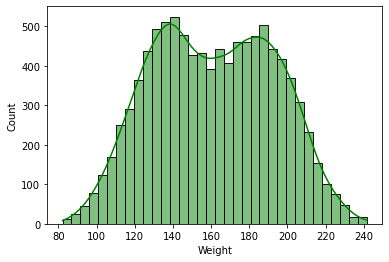

In [142]:
#Drawing New Histogram after Removing Outliers
sns.histplot(data = removed_outlier_data, x = 'Weight', color = 'green', kde = True)

In [143]:
#One Hot Encoding
dummy = pd.get_dummies(removed_outlier_data['Gender'], drop_first = True)

In [144]:
dummy

,Male
1,1
2,1
3,1
4,1
5,1
...,...
9995,0
9996,0
9997,0
9998,0


In [145]:
new_df = removed_outlier_data.drop('Gender', axis = 'columns')

In [146]:
new_df

,Height,Weight
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [147]:
df = pd.concat([new_df, dummy], axis = 1)

In [148]:
df

,Height,Weight,Male
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
5,67.253016,152.212156,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [149]:
#Dividing Datas into Features and Labe
x = df.drop(['Weight'], axis = 1)

In [150]:
x

,Height,Male
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
5,67.253016,1
...,...,...
9995,66.172652,0
9996,67.067155,0
9997,63.867992,0
9998,69.034243,0


In [151]:
y = df['Weight']

In [152]:
y

1       162.310473
2       212.740856
3       220.042470
4       206.349801
5       152.212156
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 9973, dtype: float64

# Train and Test Spliting

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

In [155]:
xtrain.shape

(6981, 2)

In [156]:
ytrain.shape

(6981,)

# Developing Model using Linear Regression after Removing Outlier

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lr = LinearRegression()

In [159]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [160]:
lr.predict(xtest)

array([195.81619452, 209.70002396, 114.87807695, ..., 136.18398417,
       164.24454204, 151.91017373])

In [161]:
lr.coef_

array([ 5.91688188, 19.32843505])

In [162]:
lr.intercept_

-240.90324636511613

In [163]:
lr.score(xtrain, ytrain) #Score is greater than without removing outlier

0.9029990148872931

In [164]:
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
pred = lr.predict(xtest)

In [166]:
mean_squared_error(ytest, pred)

102.92220510250716

In [167]:
r2_score(ytest, pred)

0.8983701791089629

# Developing Model using KNN

In [236]:
from sklearn.neighbors import KNeighborsRegressor

In [237]:
knn = KNeighborsRegressor(n_neighbors = 105)

In [238]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=105)

In [244]:
pred2 = knn.predict(xtest)

In [245]:
knn.score(xtest, ytest)

0.8960485053999334

In [246]:
mean_squared_error(ytest, pred2)

105.27340257158498

In [247]:
r2_score(ytest, pred2)

0.8960485053999334